In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rcParams['lines.linewidth'] = 1
matplotlib.rcParams["errorbar.capsize"] = 3
plt.style.use('seaborn')

In [2]:
# Choose the "true" parameters.
m_true = -0.9594
b_true = 4.294
f_true = 0.534

# Generate some synthetic data from the model.
N = 50
x = np.sort(10*np.random.rand(N))
yerr = 0.1+0.5*np.random.rand(N)
y = m_true*x+b_true
y += np.abs(f_true*y) * np.random.randn(N)
y += yerr * np.random.randn(N)

y_true = m_true*x + b_true

Text(0, 0.5, 'y')

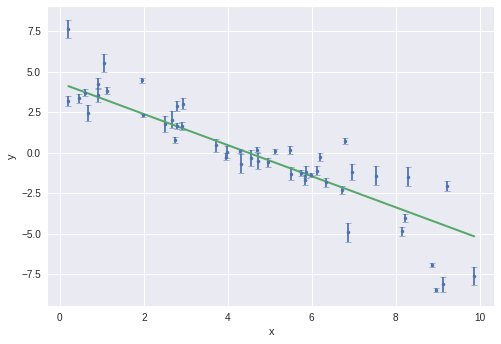

In [5]:
plt.errorbar(x, y, yerr=yerr, fmt='.', capthick=0.5)
plt.plot(x, y_true, linewidth=2)
plt.xlabel('x')
plt.ylabel('y')

In [6]:
A = np.vstack((np.ones_like(x), x)).T
C = np.diag(yerr * yerr)
cov = np.linalg.inv(np.dot(A.T, np.linalg.solve(C, A)))
b_ls, m_ls = np.dot(cov, np.dot(A.T, np.linalg.solve(C, y)))

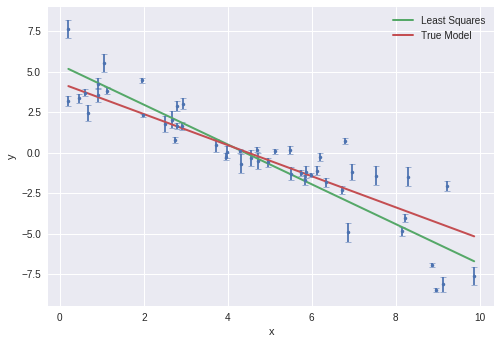

In [12]:
y_ls = x * m_ls + b_ls

plt.errorbar(x, y, yerr=yerr, fmt='.', capthick=0.5)
plt.plot(x, y_ls, linewidth=2, label = 'Least Squares')
plt.plot(x, y_true, linewidth=2, label = 'True Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [13]:
cov

array([[ 0.00467257, -0.00075877],
       [-0.00075877,  0.00015903]])

In [15]:
np.sqrt(cov[1,1])

0.01261075018260224